In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import probplot

In [2]:
# Importing the datasets
df_original = pd.read_csv("../waters_datasets/Merged_Dataset_For_Trainging.csv", encoding= 'unicode_escape')

df_new = pd.read_csv("./list_of_stations.csv", encoding = 'unicode_escape')

In [3]:
df_new.dtypes

Water Quality\nStation Code               float64
Name or Location of Monitoring Station     object
State/UT                                   object
Type of Water\nBody                        object
Frequency of\nMonitoring                   object
Latitude                                   object
Longitude                                 float64
Unnamed: 7                                float64
dtype: object

In [4]:
df_new.head()

,Water Quality\nStation Code,Name or Location of Monitoring Station,State/UT,Type of Water\nBody,Frequency of\nMonitoring,Latitude,Longitude,Unnamed: 7
0,14.0,"GODAVARI AT POLAVARAM, WEST GODAVARI DISTRICT",ANDHRA PRADESH,RIVER,MONTHLY,17.247331,81.646613,NaN
1,25.0,"KRISHNA AT VIJAYWADA, KRISHNA",ANDHRA PRADESH,RIVER,MONTHLY,16.492476,80.640839,NaN
2,26.0,"WELL AT GRAM PANCHAYAT OFFICE, KAANURU, VIJAYWADA",ANDHRA PRADESH,GROUND WATER,HALF-YEARLY,16.508853,80.641519,NaN
3,30.0,"PENNAR AT SIDDVATAM, KADAPA",ANDHRA PRADESH,RIVER,MONTHLY,14.464393,78.964627,NaN
4,1174.0,"TUNGABHADRA AT KURNOOL U/S, BHAVAPURAM, KURNOOL",ANDHRA PRADESH,RIVER,MONTHLY,15.8483,78.034942,NaN


In [5]:
#Drop random column
df_new.drop("Unnamed: 7", inplace = True, axis = 1)

<AxesSubplot:>

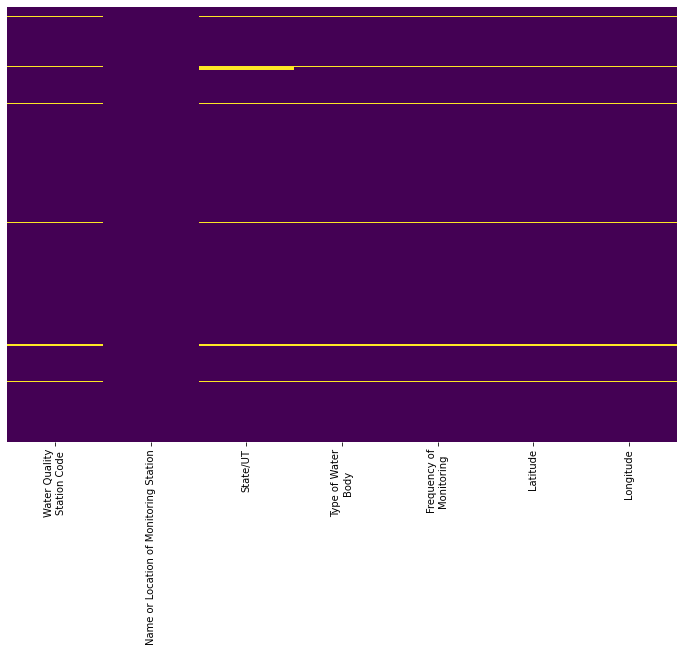

In [6]:
# checking for missing values in the dataset
plt.figure(figsize=(12,8))
sns.heatmap(df_new.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [7]:
#drop all rows with missing values
df_new.dropna(axis = 0, inplace = True)

In [8]:
#Change types of latitude and station code to float and int
df_new["Latitude"] = pd.to_numeric(df_new["Latitude"], errors='coerce')
df_new["Water Quality\nStation Code"] = df_new["Water Quality\nStation Code"].astype(int)

In [9]:
df_new.head()

,Water Quality\nStation Code,Name or Location of Monitoring Station,State/UT,Type of Water\nBody,Frequency of\nMonitoring,Latitude,Longitude
0,14,"GODAVARI AT POLAVARAM, WEST GODAVARI DISTRICT",ANDHRA PRADESH,RIVER,MONTHLY,17.247331,81.646613
1,25,"KRISHNA AT VIJAYWADA, KRISHNA",ANDHRA PRADESH,RIVER,MONTHLY,16.492476,80.640839
2,26,"WELL AT GRAM PANCHAYAT OFFICE, KAANURU, VIJAYWADA",ANDHRA PRADESH,GROUND WATER,HALF-YEARLY,16.508853,80.641519
3,30,"PENNAR AT SIDDVATAM, KADAPA",ANDHRA PRADESH,RIVER,MONTHLY,14.464393,78.964627
4,1174,"TUNGABHADRA AT KURNOOL U/S, BHAVAPURAM, KURNOOL",ANDHRA PRADESH,RIVER,MONTHLY,15.848300,78.034942


In [10]:
df_original.shape

(1598, 14)

Creating columns for longitude and latitude in the original dataset.

In [11]:
latitude = [0.0 for x in range(1598)]
df_original["latitude"] = latitude
longitude = [0.0 for x in range(1598)]
df_original["longitude"] = longitude

df_original.head()

,Unnamed: 0,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,WQI,WQI clf,latitude,longitude
0,0,1533.0,"*DIGBOI, TINSUKIA DISTT.,ÃÂ ÃÂ ASSAM",Assam,23.5,6.6,6.5,748.0,1.4,7.0,18.0,12000.0,46.167450,2,0.0,0.0
1,1,1534.0,"*KARBIÃÂ ÃÂ ANGLONG DISTT., ASSAM",Assam,23.5,6.6,6.4,338.0,1.1,0.7,75.0,5500.0,40.826550,2,0.0,0.0
2,2,1535.0,"*SIBSAGAR , ASSAM",Assam,24.5,6.6,7.0,333.0,1.4,0.5,0.0,91.0,51.027703,1,0.0,0.0
3,3,1536.0,"*SIBSAGAR, ASSAM",Assam,22.5,6.6,5.7,791.0,1.9,0.3,0.0,46.0,32.954697,2,0.0,0.0
4,4,1537.0,"*(JORHAT, ASSAM",Assam,24.5,6.6,7.0,510.0,2.2,3.1,54.0,3350.0,60.342890,1,0.0,0.0


In [12]:
df_original = df_original.drop(["Unnamed: 0","LOCATIONS","STATE","Temp","DO","PH","Conductivity","WQI","BOD","NI","Fec_col","Tot_col"], axis = 1)

In [13]:
df_original.dtypes

STATION CODE    float64
WQI clf           int64
latitude        float64
longitude       float64
dtype: object

Rename the columns

In [14]:
# Changing column names
df_original = df_original.rename(columns={"STATION CODE":"S.Code"})

In [15]:
df_original.dtypes

S.Code       float64
WQI clf        int64
latitude     float64
longitude    float64
dtype: object

In [16]:
print(df_original.loc[(df_original['longitude'] == 0) & (df_original['S.Code'] == 1533.0)])

     S.Code  WQI clf  latitude  longitude
0    1533.0        2       0.0        0.0
890  1533.0        2       0.0        0.0


Remove the duplicates from the dataframe. We will keep just one instance from the instances that have the same station code to simplify the  process.

In [17]:
df_original = df_original.drop_duplicates("S.Code")

Group by the station code becuase there are multiple instances that have the same station code but different measurements.

In [18]:
station_code_groups = df_original.groupby('S.Code')

In [19]:
for name, group in station_code_groups:
    print(name)
    print(group)
    print("\n")

3.0
      S.Code  WQI clf  latitude  longitude
1050     3.0        1       0.0        0.0


7.0
     S.Code  WQI clf  latitude  longitude
599     7.0        0       0.0        0.0


9.0
     S.Code  WQI clf  latitude  longitude
431     9.0        1       0.0        0.0


10.0
     S.Code  WQI clf  latitude  longitude
432    10.0        0       0.0        0.0


11.0
      S.Code  WQI clf  latitude  longitude
1476    11.0        0       0.0        0.0


12.0
      S.Code  WQI clf  latitude  longitude
1437    12.0        0       0.0        0.0


13.0
      S.Code  WQI clf  latitude  longitude
1448    13.0        1       0.0        0.0


14.0
      S.Code  WQI clf  latitude  longitude
1453    14.0        1       0.0        0.0


15.0
     S.Code  WQI clf  latitude  longitude
868    15.0        2       0.0        0.0


16.0
     S.Code  WQI clf  latitude  longitude
869    16.0        2       0.0        0.0


19.0
    S.Code  WQI clf  latitude  longitude
31    19.0        2       0.0        

484  1289.0        0       0.0        0.0


1291.0
     S.Code  WQI clf  latitude  longitude
567  1291.0        1       0.0        0.0


1292.0
     S.Code  WQI clf  latitude  longitude
568  1292.0        1       0.0        0.0


1304.0
     S.Code  WQI clf  latitude  longitude
775  1304.0        1       0.0        0.0


1306.0
     S.Code  WQI clf  latitude  longitude
774  1306.0        1       0.0        0.0


1307.0
     S.Code  WQI clf  latitude  longitude
773  1307.0        0       0.0        0.0


1309.0
     S.Code  WQI clf  latitude  longitude
572  1309.0        1       0.0        0.0


1310.0
     S.Code  WQI clf  latitude  longitude
196  1310.0        0       0.0        0.0


1311.0
     S.Code  WQI clf  latitude  longitude
794  1311.0        1       0.0        0.0


1312.0
      S.Code  WQI clf  latitude  longitude
1423  1312.0        0       0.0        0.0


1313.0
     S.Code  WQI clf  latitude  longitude
428  1313.0        0       0.0        0.0


1314.0
     S.Code  WQI 

     S.Code  WQI clf  latitude  longitude
736  1496.0        1       0.0        0.0


1497.0
     S.Code  WQI clf  latitude  longitude
741  1497.0        1       0.0        0.0


1498.0
     S.Code  WQI clf  latitude  longitude
749  1498.0        1       0.0        0.0


1499.0
     S.Code  WQI clf  latitude  longitude
751  1499.0        1       0.0        0.0


1509.0
     S.Code  WQI clf  latitude  longitude
184  1509.0        0       0.0        0.0


1510.0
     S.Code  WQI clf  latitude  longitude
451  1510.0        2       0.0        0.0


1513.0
     S.Code  WQI clf  latitude  longitude
879  1513.0        1       0.0        0.0


1514.0
     S.Code  WQI clf  latitude  longitude
880  1514.0        1       0.0        0.0


1515.0
     S.Code  WQI clf  latitude  longitude
881  1515.0        1       0.0        0.0


1516.0
     S.Code  WQI clf  latitude  longitude
882  1516.0        1       0.0        0.0


1517.0
     S.Code  WQI clf  latitude  longitude
883  1517.0        1       0

     S.Code  WQI clf  latitude  longitude
931  1731.0        1       0.0        0.0


1732.0
     S.Code  WQI clf  latitude  longitude
932  1732.0        1       0.0        0.0


1733.0
     S.Code  WQI clf  latitude  longitude
933  1733.0        1       0.0        0.0


1734.0
     S.Code  WQI clf  latitude  longitude
934  1734.0        1       0.0        0.0


1735.0
     S.Code  WQI clf  latitude  longitude
475  1735.0        0       0.0        0.0


1736.0
    S.Code  WQI clf  latitude  longitude
91  1736.0        0       0.0        0.0


1737.0
    S.Code  WQI clf  latitude  longitude
92  1737.0        1       0.0        0.0


1738.0
    S.Code  WQI clf  latitude  longitude
93  1738.0        1       0.0        0.0


1739.0
    S.Code  WQI clf  latitude  longitude
94  1739.0        1       0.0        0.0


1740.0
    S.Code  WQI clf  latitude  longitude
95  1740.0        1       0.0        0.0


1741.0
    S.Code  WQI clf  latitude  longitude
96  1741.0        1       0.0        0.


1901.0
     S.Code  WQI clf  latitude  longitude
188  1901.0        1       0.0        0.0


1902.0
     S.Code  WQI clf  latitude  longitude
189  1902.0        1       0.0        0.0


1903.0
     S.Code  WQI clf  latitude  longitude
190  1903.0        1       0.0        0.0


1904.0
     S.Code  WQI clf  latitude  longitude
796  1904.0        1       0.0        0.0


1905.0
     S.Code  WQI clf  latitude  longitude
797  1905.0        0       0.0        0.0


1906.0
     S.Code  WQI clf  latitude  longitude
194  1906.0        0       0.0        0.0


1907.0
     S.Code  WQI clf  latitude  longitude
437  1907.0        0       0.0        0.0


1908.0
      S.Code  WQI clf  latitude  longitude
1477  1908.0        0       0.0        0.0


1909.0
      S.Code  WQI clf  latitude  longitude
1478  1909.0        0       0.0        0.0


1910.0
      S.Code  WQI clf  latitude  longitude
1471  1910.0        0       0.0        0.0


1911.0
      S.Code  WQI clf  latitude  longitude
1379  1911.0 

     S.Code  WQI clf  latitude  longitude
434  2115.0        1       0.0        0.0


2117.0
     S.Code  WQI clf  latitude  longitude
499  2117.0        0       0.0        0.0


2119.0
     S.Code  WQI clf  latitude  longitude
469  2119.0        0       0.0        0.0


2120.0
     S.Code  WQI clf  latitude  longitude
477  2120.0        1       0.0        0.0


2121.0
     S.Code  WQI clf  latitude  longitude
470  2121.0        1       0.0        0.0


2122.0
     S.Code  WQI clf  latitude  longitude
471  2122.0        1       0.0        0.0


2123.0
     S.Code  WQI clf  latitude  longitude
585  2123.0        1       0.0        0.0


2124.0
     S.Code  WQI clf  latitude  longitude
473  2124.0        1       0.0        0.0


2125.0
     S.Code  WQI clf  latitude  longitude
474  2125.0        0       0.0        0.0


2126.0
     S.Code  WQI clf  latitude  longitude
489  2126.0        0       0.0        0.0


2127.0
     S.Code  WQI clf  latitude  longitude
438  2127.0        0       0

      S.Code  WQI clf  latitude  longitude
1572  2240.0        1       0.0        0.0


2241.0
      S.Code  WQI clf  latitude  longitude
1573  2241.0        2       0.0        0.0


2242.0
      S.Code  WQI clf  latitude  longitude
1574  2242.0        2       0.0        0.0


2243.0
    S.Code  WQI clf  latitude  longitude
10  2243.0        3       0.0        0.0


2244.0
    S.Code  WQI clf  latitude  longitude
11  2244.0        0       0.0        0.0


2245.0
    S.Code  WQI clf  latitude  longitude
12  2245.0        2       0.0        0.0


2246.0
    S.Code  WQI clf  latitude  longitude
13  2246.0        2       0.0        0.0


2247.0
    S.Code  WQI clf  latitude  longitude
14  2247.0        2       0.0        0.0


2248.0
    S.Code  WQI clf  latitude  longitude
15  2248.0        1       0.0        0.0


2249.0
    S.Code  WQI clf  latitude  longitude
16  2249.0        2       0.0        0.0


2250.0
    S.Code  WQI clf  latitude  longitude
17  2250.0        2       0.0        

     S.Code  WQI clf  latitude  longitude
396  2568.0        0       0.0        0.0


2569.0
     S.Code  WQI clf  latitude  longitude
407  2569.0        0       0.0        0.0


2570.0
     S.Code  WQI clf  latitude  longitude
397  2570.0        0       0.0        0.0


2575.0
     S.Code  WQI clf  latitude  longitude
400  2575.0        0       0.0        0.0


2617.0
     S.Code  WQI clf  latitude  longitude
458  2617.0        2       0.0        0.0


2618.0
     S.Code  WQI clf  latitude  longitude
459  2618.0        2       0.0        0.0


2619.0
     S.Code  WQI clf  latitude  longitude
460  2619.0        2       0.0        0.0


2620.0
     S.Code  WQI clf  latitude  longitude
452  2620.0        1       0.0        0.0


2621.0
     S.Code  WQI clf  latitude  longitude
455  2621.0        2       0.0        0.0


2622.0
     S.Code  WQI clf  latitude  longitude
456  2622.0        2       0.0        0.0


2623.0
     S.Code  WQI clf  latitude  longitude
457  2623.0        1       0

     S.Code  WQI clf  latitude  longitude
138  3051.0        1       0.0        0.0


3052.0
     S.Code  WQI clf  latitude  longitude
165  3052.0        0       0.0        0.0


3053.0
     S.Code  WQI clf  latitude  longitude
166  3053.0        1       0.0        0.0


3054.0
     S.Code  WQI clf  latitude  longitude
167  3054.0        0       0.0        0.0


3055.0
     S.Code  WQI clf  latitude  longitude
548  3055.0        0       0.0        0.0


3056.0
     S.Code  WQI clf  latitude  longitude
549  3056.0        0       0.0        0.0


3057.0
     S.Code  WQI clf  latitude  longitude
550  3057.0        0       0.0        0.0


3058.0
     S.Code  WQI clf  latitude  longitude
168  3058.0        0       0.0        0.0


3059.0
     S.Code  WQI clf  latitude  longitude
169  3059.0        0       0.0        0.0


3060.0
     S.Code  WQI clf  latitude  longitude
170  3060.0        0       0.0        0.0


3061.0
     S.Code  WQI clf  latitude  longitude
171  3061.0        0       0

Copying the longitude and latitude from the dataset that contains data values into the original dataset.

In [20]:
df_original["S.Code"] = df_original["S.Code"].astype(int)
df_original.dtypes

S.Code         int64
WQI clf        int64
latitude     float64
longitude    float64
dtype: object

In [21]:
df_new.dtypes

Water Quality\nStation Code                 int64
Name or Location of Monitoring Station     object
State/UT                                   object
Type of Water\nBody                        object
Frequency of\nMonitoring                   object
Latitude                                  float64
Longitude                                 float64
dtype: object

In [22]:
#Create a dictionary with all station codes, latitude and longitude
my_dict= {x:(y,z)for x,y,z in df_new[['Water Quality\nStation Code','Latitude','Longitude']].itertuples(index = False, name= None)}

In [23]:
my_dict

{14: (17.247331, 81.646613),
 25: (16.492476, 80.640839),
 26: (16.508853, 80.641519),
 30: (14.464393, 78.964627),
 1174: (15.8483, 78.034942),
 1175: (16.001874, 78.364986),
 1177: (16.670823, 80.297751),
 1178: (16.951698, 80.048401),
 1218: (17.069466, 81.711134),
 1219: (17.007975, 81.763328),
 1255: (14.150574, 77.822711),
 1256: (14.572795, 78.79715),
 1257: (14.481442, 79.290142),
 1448: (18.787433, 83.494512),
 1513: (16.501486, 80.675692),
 1514: (16.501508, 80.676725),
 1516: (14.445036, 79.987869),
 1517: (15.8363, 78.048593),
 1518: (15.479222, 78.480942),
 1519: (13.321417, 79.585592),
 1520: (13.758251, 79.701872),
 1521: (17.704261, 83.211783),
 1522: (18.104532, 83.397197),
 1523: (17.015144, 81.736181),
 1524: (16.971003, 82.219006),
 1782: (16.000123, 81.079082),
 1785: (15.944453, 77.419709),
 1786: (16.801875, 80.129553),
 1787: (16.582608, 80.343451),
 1790: (13.710482, 80.084494),
 2350: (15.819061, 78.056866),
 2351: (15.49, 78.4748),
 2352: (18.343003, 84.12432

In [24]:
#assign all the values with same station code to the original dataset
for k, v in my_dict.items():
    df_original["latitude"].loc[df_original["S.Code"] == k] = v[0] 
    df_original["longitude"].loc[df_original["S.Code"] == k] = v[1]

/usr/local/home/namdd/Documents/github (backed up)/environments/water_q_venv/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [25]:
df_original.head(20)

,S.Code,WQI clf,latitude,longitude
0,1533,2,27.396089,95.631783
1,1534,2,26.105415,93.113917
2,1535,1,26.980000,94.630000
3,1536,2,26.979722,94.632211
4,1537,1,26.750143,94.219855
5,1538,3,24.820617,92.802431
6,1539,1,26.315597,90.996408
7,1540,2,26.480000,90.560000
8,1541,1,26.145228,91.736806
9,1542,0,26.144100,91.735194


In [26]:
df_original.to_csv("dataset_with_long_lat.csv", index = False)